<a href="https://colab.research.google.com/github/israelalex2323-perez/IA-013-PEREZ-REMIGIO-ISRAEL-ALEXANDER-2007050/blob/main/ACTIVIDADES/%20%22AF7_RNP%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#INTELIGENCIA ARTIFICIAL 013 N4 - N6
#AF7 Redes neuronales artificiales
#Nombre:
#Carmen Belén Contreras Vazquez Matrícula: 2173848 ; Carrera: IMTC
#ISRAEL ALEXANDER PEREZ REMIGIO Matrícula: 2007050 ; Carrera: IMTC
#Fátima Quetzali Rodríguez Reyna Matrícula: 1958057 ; Carrera: IMTC

In [ ]:
#Librerias
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#Cargando el conjunto dee datos MNIST
(train_images, train_labels),(test_images, test_labels) = keras.datasets.mnist.load_data()
print("Tamaño del conjunto de entrenamiento", train_images.shape)
print("Tamaño del conjunto de prueba", test_images.shape)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Tamaño del conjunto de entrenamiento (60000, 28, 28)
Tamaño del conjunto de prueba (10000, 28, 28)


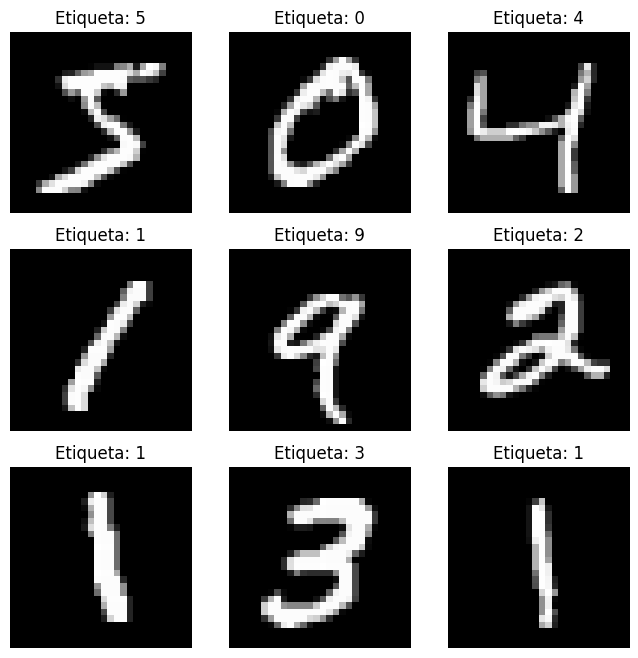

In [ ]:
#Procesamiento de datos
#Escalar los valores de pixel
train_images = train_images / 255.0
test_images = test_images / 255.0
#Mostrar algunas imagenes de ejemplo
plt.figure(figsize=(8,8))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(train_images[i], cmap='gray')
    plt.title(f"Etiqueta: {train_labels[i]}")
    plt.axis('off')
plt.show()

In [ ]:
#Definiendo el modelo (red neuronal artificial prealimentada)
model = keras.Sequential([
    layers.Flatten(input_shape=(28, 28)), #aplanar la imagen de entrada
    layers.Dense(128, activation='relu'), #capa oculta con 128 neuronas y función de activación ReLU
    layers.Dense(64, activation='relu'), #capa oculta con 64 neuronas y función de activación ReLU
    layers.Dense(10, activation='softmax') #capa de salida con 10 neuronas (una por cada dígito) y función de activación softmax
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
#Compilar modelo
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
#Entrenar el modelo
history = model.fit(train_images, train_labels, epochs=10, batch_size=128, validation_split=0.2,verbose=1)

Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8078 - loss: 0.6878 - val_accuracy: 0.9488 - val_loss: 0.1760
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9535 - loss: 0.1607 - val_accuracy: 0.9643 - val_loss: 0.1241
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9695 - loss: 0.1041 - val_accuracy: 0.9652 - val_loss: 0.1154
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9776 - loss: 0.0773 - val_accuracy: 0.9705 - val_loss: 0.0987
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9844 - loss: 0.0563 - val_accuracy: 0.9740 - val_loss: 0.0908
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9868 - loss: 0.0455 - val_accuracy: 0.9725 - val_loss: 0.0938
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9892 - loss: 0.0372 - val_accuracy: 0.9686 - val_loss: 0.1035
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9907 - loss: 0.0314 - val_accuracy: 0.

In [ ]:
#Evaluacion del modelo con el conjunto de prueba
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=0)
print(f"Exactitud del modelo en el conjunto de prueba: {test_acc: .4f}%")

Exactitud del modelo en el conjunto de prueba:  0.9730%


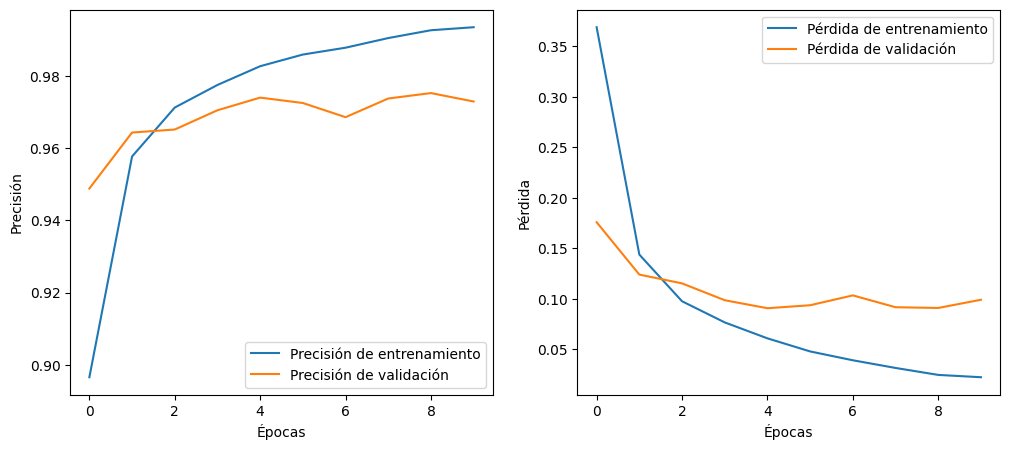

In [ ]:
#Gráficar la precisión y pérdida
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Precisión de entrenamiento')
plt.plot(history.history['val_accuracy'], label='Precisión de validación')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Pérdida de entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida de validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


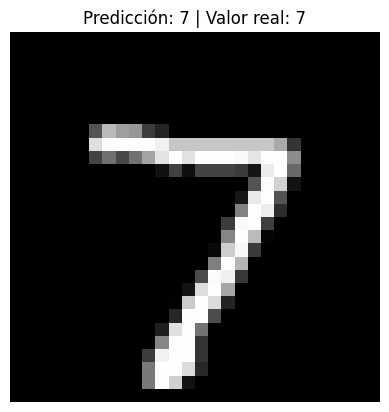

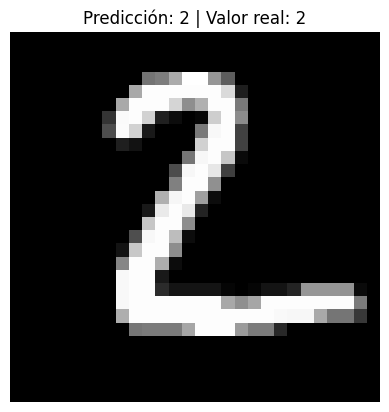

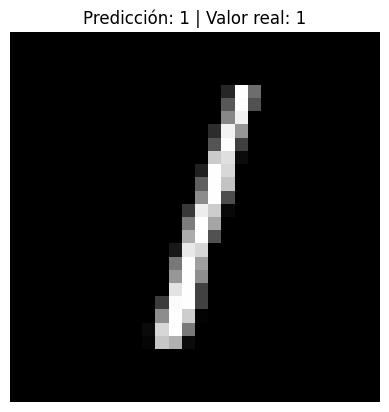

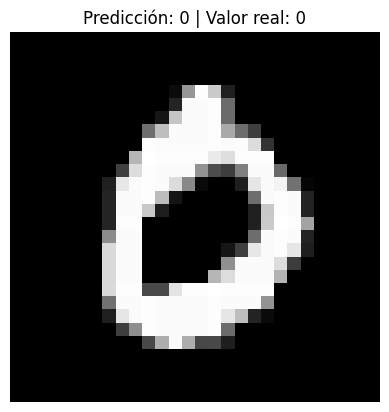

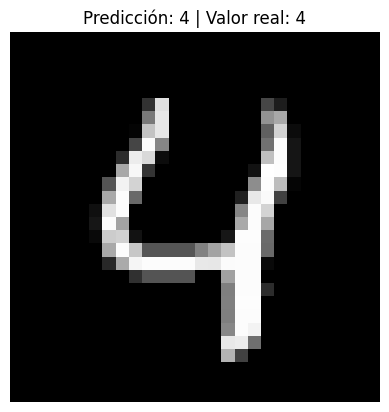

In [ ]:
#Realización de 5 predicciones
predictions = model.predict(test_images[:5])
predicted_classes = np.argmax(predictions, axis=1)
for i in range(5):
    plt.imshow(test_images[i], cmap='gray')
    plt.title(f"Predicción: {predicted_classes[i]} | Valor real: {test_labels[i]}")
    plt.axis('off')
    plt.show()